In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
#import plotly.express as px
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics.pairwise import cosine_similarity

# Data Collection and Pre-Processing

In [2]:
# loading the data from csv file to pandas dataframe 
data = pd.read_csv("Top2000CompaniesGlobally.csv")

In [3]:
# display top 5 rows 
data.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [4]:
# display last 5 rows
data.tail()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
1919,1995,Tractor Supply,4.7,0.3,1.7,7.1,USA,North America,37.090240,-95.712891
1920,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924
1921,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836
1922,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,South America,4.570868,-74.297333
1923,1999,Old Republic International,5.0,-0.1,16.2,3.3,USA,North America,37.090240,-95.712891


In [5]:
# shape of data (no of rows & columns in dataset)
data.shape

(1924, 10)

In [6]:
# get info about rows, columns, datatypes of columns and memory
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [7]:
# check null values in dataset
data.isnull()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1919,False,False,False,False,False,False,False,False,False,False
1920,False,False,False,False,False,False,False,False,False,False
1921,False,False,False,False,False,False,False,False,False,False
1922,False,False,False,False,False,False,False,False,False,False


In [8]:
# Take the required columns only for our project requirement
#data.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [9]:
# total null values in dataset
data.isnull().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

if we got any null values then we will use dropna() method to remove that rows/columns.
syntax ---> dataframe.dropna(axis, how, thresh, subset, inplace) (column will be removed with axis=1 and row when axis=0)

In [10]:
# dropna() method removes the rows that contains NULL values.
# The dropna() method returns a new DataFrame object unless the inplace parameter is set to True,
# in that case the dropna() method does the removing in the original DataFrame instead.

data.dropna()


,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.090240,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...
1919,1995,Tractor Supply,4.7,0.3,1.7,7.1,USA,North America,37.090240,-95.712891
1920,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924
1921,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836
1922,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,South America,4.570868,-74.297333


In [11]:
# check duplicate values
data.duplicated().sum()

0

In [12]:
# there is no duplicate values but if you have then you can use below code
data.drop_duplicates()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.090240,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...
1919,1995,Tractor Supply,4.7,0.3,1.7,7.1,USA,North America,37.090240,-95.712891
1920,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924
1921,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836
1922,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,South America,4.570868,-74.297333


# count the no of companies in each continent

In [13]:
data['Continent'].value_counts()

Asia             719
North America    629
Europe           459
South America     49
Oceania           43
Africa            25
Name: Continent, dtype: int64

# Distribution of companies by continent with the help of bar plot

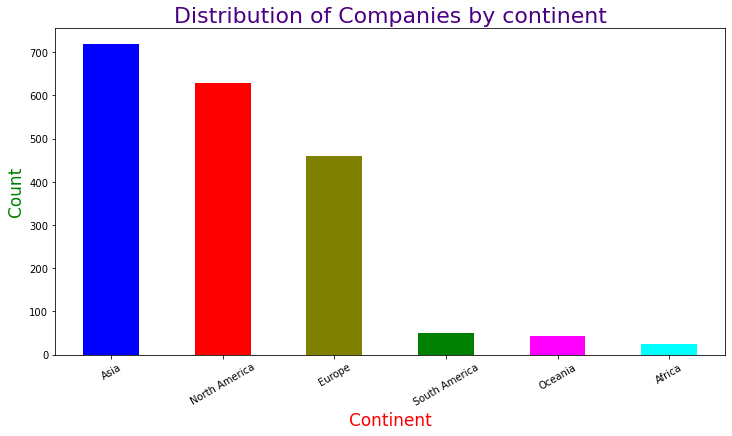

In [14]:
companies_distribution_by_continent = data['Continent'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
companies_distribution_by_continent.plot(kind='bar', color=('blue','red','olive','green','magenta','cyan','violet'))
plt.ylabel('Count', color='green',size=17)
plt.xlabel('Continent', color='red',size=17)
plt.title('Distribution of Companies by continent', color='indigo',size=22)

plt.xticks(rotation=30) #Rotate the country names for better readability 
                        # Note:- if you won't provide rotation then it automatically takes 90 degree

plt.show()

# Distribution of companies by continent with the help of pie chart

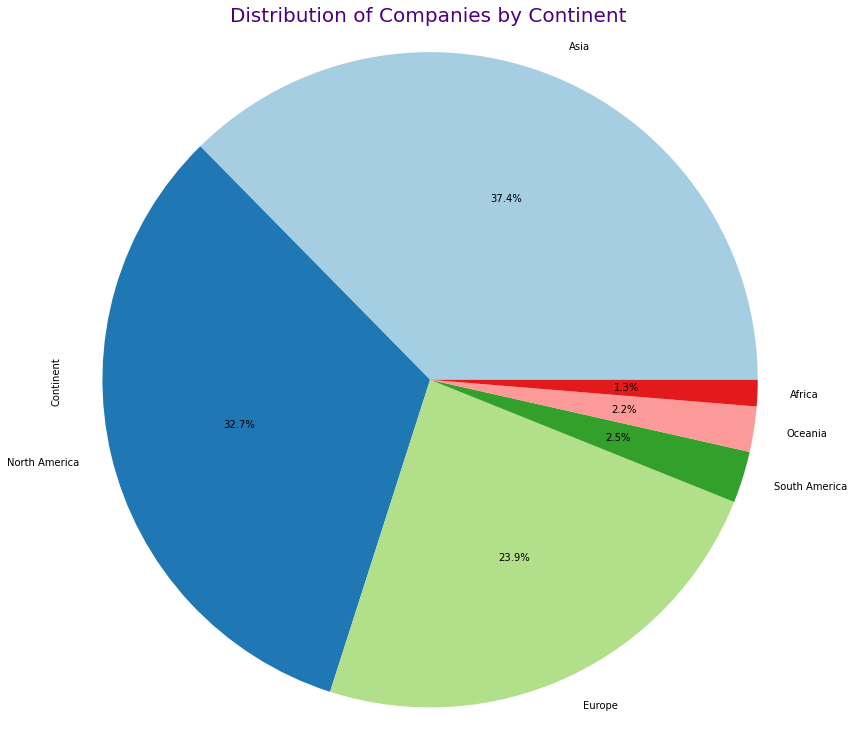

In [15]:
companies_distribution_by_continent = data['Continent'].value_counts()
plt.figure(figsize=(13,  13))
companies_distribution_by_continent.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of Companies by Continent',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# count the no of companies in each country

In [16]:
data['Country'].value_counts()

USA                     535
Japan                   246
China                   135
UK                       97
Canada                   65
South Korea              64
France                   64
India                    56
Germany                  50
Hong Kong                46
Australia                42
Taiwan                   40
Brazil                   31
Russia                   30
Italy                    29
Spain                    28
Sweden                   26
The Netherlands          24
Singapore                20
Malaysia                 20
South Africa             19
Mexico                   19
Saudi Arabia             17
Ireland                  17
Thailand                 16
Turkey                   14
United Arab Emirates     14
Finland                  12
Belgium                  11
Norway                   10
Denmark                  10
Israel                   10
Greece                   10
Indonesia                 9
Chile                     9
Bermuda             

# Distribution of companies by country with the help of bar plot

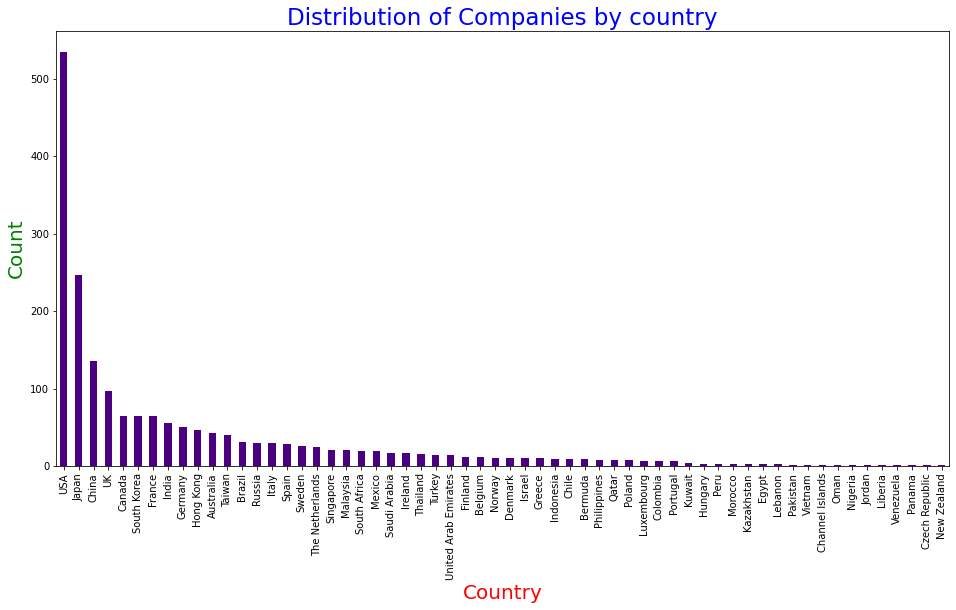

In [17]:
companies_distribution_by_country = data['Country'].value_counts()
fig, ax = plt.subplots(figsize=(16, 8))
companies_distribution_by_country.plot(kind='bar', color='indigo')
plt.ylabel('Count', color='green',size=20)
plt.xlabel('Country', color='red',size=20)
plt.title('Distribution of Companies by country', color='blue',size=23)

plt.xticks(rotation=90) #Rotate the country names for better readability 
                        # Note:- if you won't provide rotation then it automatically takes 90 degree

plt.show()

# Distribution of companies by country with the help of pie chart

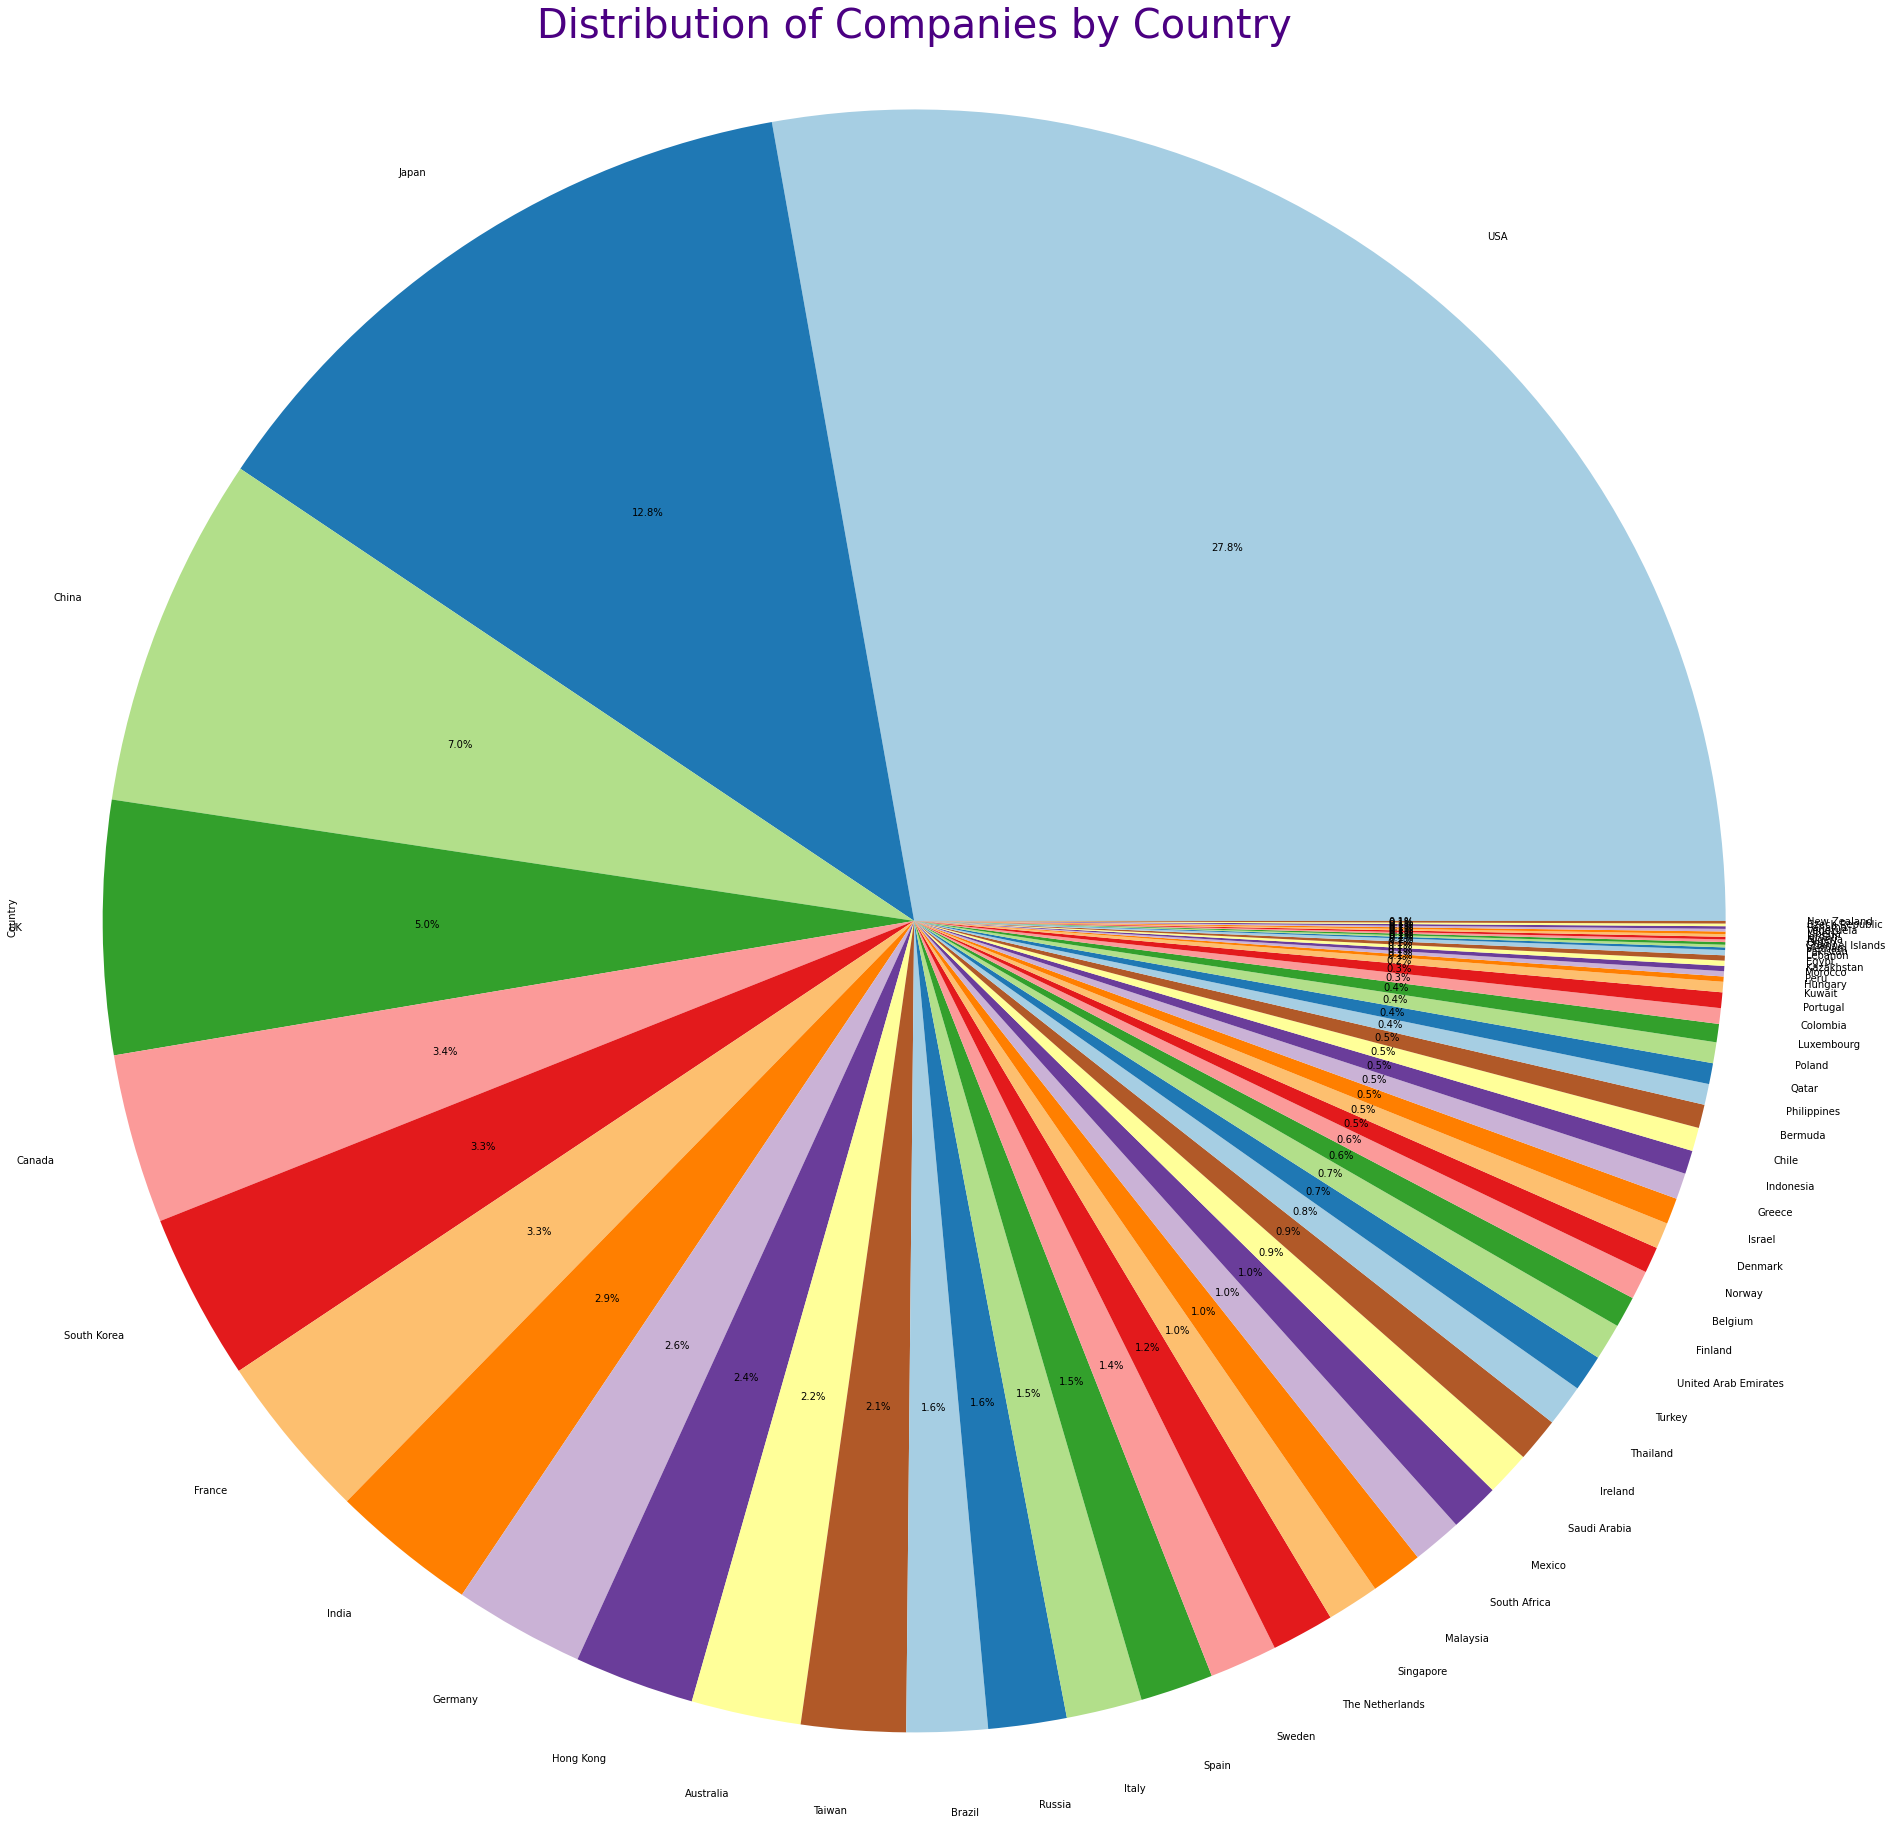

In [18]:
companies_distribution_by_country = data['Country'].value_counts()
plt.figure(figsize=(32,  32))
companies_distribution_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of Companies by Country',color='indigo',size=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# Top countries with the most company

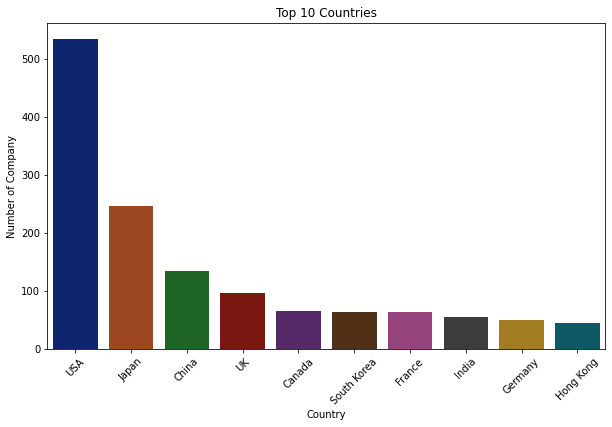

In [19]:
companies_distribution_by_country = data['Country'].value_counts()
# Select the top 10 countries with the most company for visualization
top_countries = companies_distribution_by_country[:10]
# Plot size
plt.figure(figsize=(10, 6))
# Create a bar plot for the number of company in each country
sns.barplot(x=top_countries.index, y=top_countries.values, palette='dark')
# Title and labels
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Company')

plt.xticks(rotation=45) # Rotate the country names for better readability

plt.show()

# Maximum profit making company

In [20]:
max_profit = data['Profits ($billion)'].idxmax()
company_with_max_profit = data.loc[max_profit, 'Company']

print("Company with the maximum profit:", company_with_max_profit)

Company with the maximum profit: Exxon Mobil


# Top ten companies with country by profit

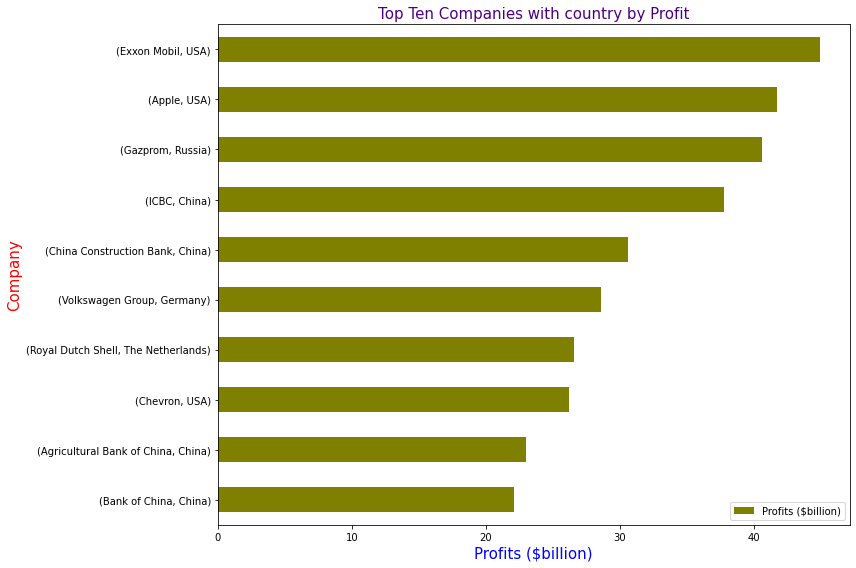

In [21]:
x=data.groupby(['Company','Country']).median()[['Profits ($billion)']]
x.sort_values('Profits ($billion)', ascending = False).head(10).plot(kind='barh', color = 'olive', figsize = (12,8))
plt.xlabel('Profits ($billion)', size=15, color='blue')
plt.ylabel('Company', size=15, color='red')
plt.title('Top Ten Companies with country by Profit', size=15, color='indigo')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()

# Display the plot
plt.show()

# Top ten companies with continent by profit

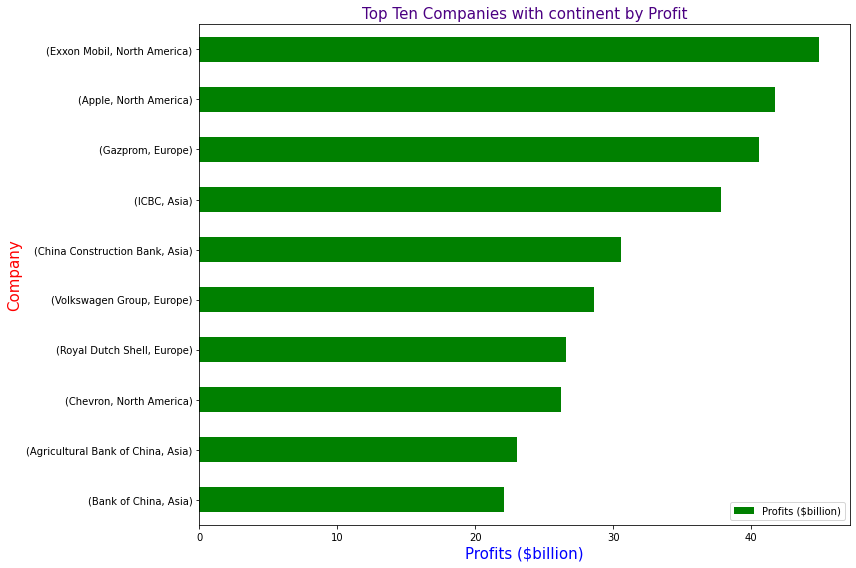

In [22]:
x=data.groupby(['Company','Continent']).median()[['Profits ($billion)']]
x.sort_values('Profits ($billion)', ascending = False).head(10).plot(kind='barh', color = 'green', figsize = (12,8))
plt.xlabel('Profits ($billion)', size=15, color='blue')
plt.ylabel('Company', size=15, color='red')
plt.title('Top Ten Companies with continent by Profit', size=15, color='indigo')

plt.gca().invert_yaxis()  # Invert y-axis for better visualization

plt.tight_layout()

# Display the plot
plt.show()

# Top ten companies by profit

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


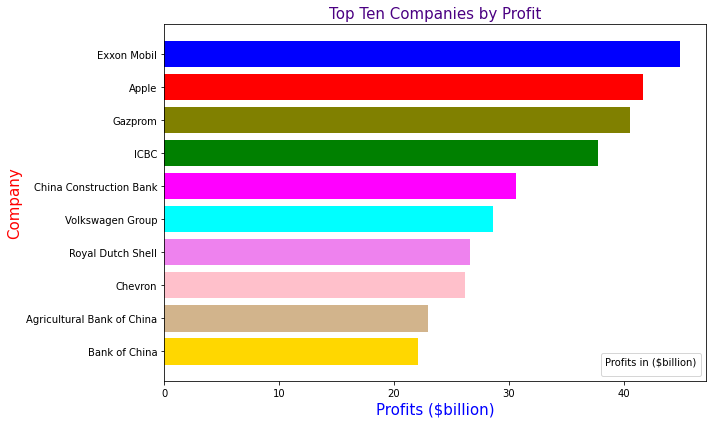

In [23]:
# Group the data by 'Company' and calculate median profits
median_profits_by_company = data.groupby('Company').median()['Profits ($billion)']

# Sort the median profits in descending order and get the top companies
top_companies = median_profits_by_company.sort_values(ascending=False).head(10)

# Create a bar plot for the top companies by median profit
plt.figure(figsize=(10, 6))
plt.barh(top_companies.index, top_companies.values, color=('blue','red','olive','green','magenta','cyan','violet','pink','tan','gold'))
plt.legend(title='Profits in ($billion)')

plt.xlabel('Profits ($billion)', size=15, color='blue')
plt.ylabel('Company', size=15, color='red')
plt.title('Top Ten Companies by Profit', size=15, color='indigo')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()

# Display the plot
plt.show()

# Top ten companies with country by Assets

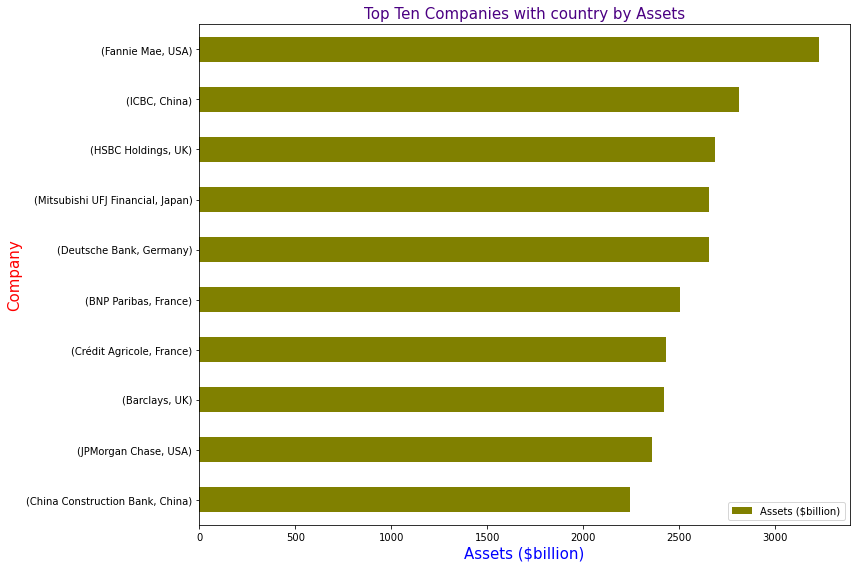

In [24]:
x=data.groupby(['Company','Country']).median()[['Assets ($billion)']]
x.sort_values('Assets ($billion)', ascending = False).head(10).plot(kind='barh', color = 'olive', figsize = (12,8))
plt.xlabel('Assets ($billion)', size=15, color='blue')
plt.ylabel('Company', size=15, color='red')
plt.title('Top Ten Companies with country by Assets', size=15, color='indigo')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()

# Display the plot
plt.show()

# Top ten companies with continent by Assets

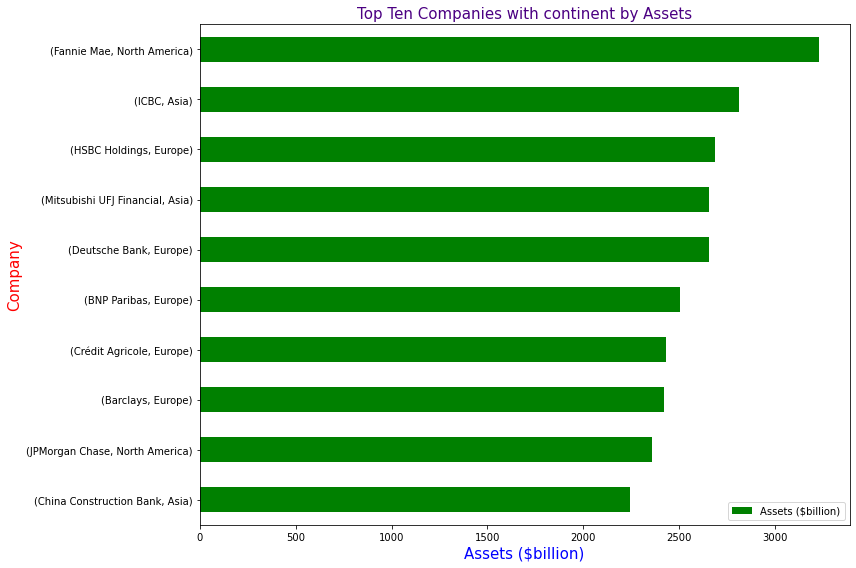

In [25]:
x=data.groupby(['Company','Continent']).median()[['Assets ($billion)']]
x.sort_values('Assets ($billion)', ascending = False).head(10).plot(kind='barh', color = 'green', figsize = (12,8))
plt.xlabel('Assets ($billion)', size=15, color='blue')
plt.ylabel('Company', size=15, color='red')
plt.title('Top Ten Companies with continent by Assets', size=15, color='indigo')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()

# Display the plot
plt.show()

# Top ten companies by Assets

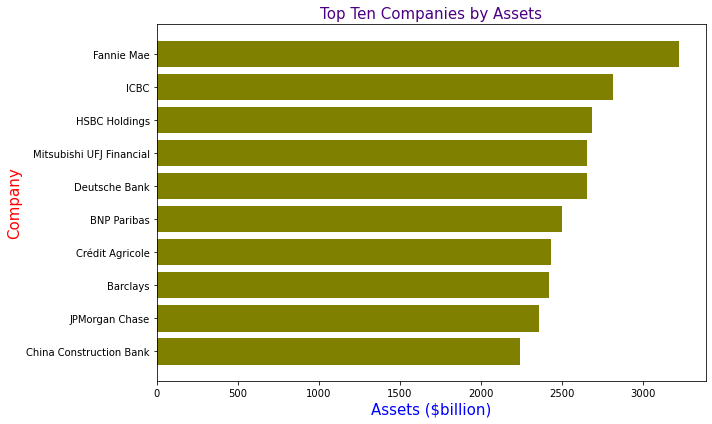

In [26]:
# Group the data by 'Company' and calculate median profits
median_profits_by_company = data.groupby('Company')['Assets ($billion)'].median()

# Sort the median profits in descending order and get the top companies
top_companies = median_profits_by_company.sort_values(ascending=False).head(10)

# Create a bar plot for the top companies by median profit
plt.figure(figsize=(10, 6))
plt.barh(top_companies.index, top_companies.values, color='olive')

plt.xlabel('Assets ($billion)', size=15, color='blue')
plt.ylabel('Company', size=15, color='red')
plt.title('Top Ten Companies by Assets', size=15, color='indigo')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()

# Display the plot
plt.show()

In [27]:
#Geo map 
#fig = px.scatter_geo(data,lat ='Latitude',lon = 'Longitude', color = 'Company' , title = 'Companies Across World')
#fig.show()

In [28]:
# get overall statistics of dataset
data.describe()

,Global Rank,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Latitude,Longitude
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,997.232848,19.265904,1.226040,79.507796,19.558160,34.618747,15.455664
std,575.502781,34.683911,3.413831,261.098775,32.957023,18.259499,92.639655
min,1.000000,0.000000,-24.500000,1.000000,0.000000,-40.900557,-106.346771
25%,500.750000,4.100000,0.300000,9.675000,5.300000,35.861660,-95.712891
50%,997.500000,9.000000,0.600000,19.250000,9.600000,37.090240,10.451526
75%,1494.250000,18.425000,1.200000,45.800000,19.200000,40.463667,105.318756
max,1999.000000,469.200000,44.900000,3226.200000,416.600000,61.924110,174.885971


In [29]:
# separating features and Target(here Country is our target column)
X = data.drop(['Company'], axis=1)
Y = data['Company']

In [30]:
print(X)

      Global Rank  Sales ($billion)  Profits ($billion)  Assets ($billion)  \
0               1             134.8                37.8             2813.5   
1               2             113.1                30.6             2241.0   
2               3             108.2                21.3             2359.1   
3               4             147.4                13.6              685.3   
4               5             420.7                44.9              333.8   
...           ...               ...                 ...                ...   
1919         1995               4.7                 0.3                1.7   
1920         1996               0.5                 0.1               25.7   
1921         1996               0.9                 0.7                7.8   
1922         1998               2.4                 0.2               14.6   
1923         1999               5.0                -0.1               16.2   

      Market Value ($billion)    Country      Continent   Latit

In [31]:
print(Y)

0                             ICBC
1          China Construction Bank
2                   JPMorgan Chase
3                 General Electric
4                      Exxon Mobil
                   ...            
1919                Tractor Supply
1920                    San-Ai Oil
1921                     UOL Group
1922       Interconexion Electrica
1923    Old Republic International
Name: Company, Length: 1924, dtype: object


In [37]:
def get_company_details(Company_name):
    # Filter data based on the input company name
    company_data = data[data['Company'] == Company_name]

    if not company_data.empty:
        # Extract the row of company data
        company_row = company_data.iloc[0]

        # Display company details
        print(f"Company Name: {company_row['Company']}")
        print(f"Global Rank: {company_row['Global Rank']}")
        print(f"Sales ($billion): {company_row['Sales ($billion)']}")
        print(f"Profit ($billion): {company_row['Profits ($billion)']}")
        print(f"Market Value ($billion): {company_row['Market Value ($billion)']}")
        print(f"Assets ($billion): {company_row['Assets ($billion)']}")
        print(f"Country: {company_row['Country']}")
        print(f"Continent: {company_row['Continent']}")
        print(f"Latitude: {company_row['Latitude']}")
        print(f"Longitude: {company_row['Longitude']}")
    else:
        print(f"No details found for company: {Company}")

# Test the function with a specific company
get_company_details('ICBC')


Company Name: ICBC
Global Rank: 1
Sales ($billion): 134.8
Profit ($billion): 37.8
Market Value ($billion): 237.3
Assets ($billion): 2813.5
Country: China
Continent: Asia
Latitude: 35.86166
Longitude: 104.195397


In [38]:
import pickle

In [39]:
pickle.dump(data,open('company.pkl','wb'))

In [40]:
data['Company'][1:12]

1        China Construction Bank
2                 JPMorgan Chase
3               General Electric
4                    Exxon Mobil
5                  HSBC Holdings
6              Royal Dutch Shell
7     Agricultural Bank of China
8                     PetroChina
9             Berkshire Hathaway
10                 Bank of China
11                   Wells Fargo
Name: Company, dtype: object

In [41]:
data['Company'][65]

'Google'